In [1]:
# 02_build_simple_rankings.ipynb
# 📊 Building Simple Team Power Rankings

# 🛠 Requirements:
# - pandas, matplotlib, seaborn (install via `pip install pandas matplotlib seaborn`)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_DIR = "./data"

# Configure plots
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,8]


In [2]:
# 🔢 Load advanced season stats for a recent year
stats_path = os.path.join(DATA_DIR, "advanced_season_stats", "2023.csv")
stats = pd.read_csv(stats_path)

print(f"{len(stats)} records loaded")
stats.head()

134 records loaded


,season,team,conference,offense_passingPlays_explosiveness,offense_passingPlays_successRate,offense_passingPlays_totalPPA,offense_passingPlays_ppa,offense_passingPlays_rate,offense_rushingPlays_explosiveness,offense_rushingPlays_successRate,...,defense_lineYardsTotal,defense_lineYards,defense_stuffRate,defense_powerSuccess,defense_explosiveness,defense_successRate,defense_totalPPA,defense_ppa,defense_drives,defense_plays
0,2023,Air Force,Mountain West,2.308738,0.409091,54.829427,0.498449,0.134639,0.971259,0.469417,...,964,2.722316,0.180791,0.780000,1.176033,0.402204,86.218708,0.118759,137,726
1,2023,Akron,Mid-American,1.328119,0.357143,29.299802,0.067511,0.591281,0.869081,0.405594,...,1225,3.010319,0.159705,0.727273,1.340526,0.397878,101.048131,0.134016,139,754
2,2023,Alabama,SEC,1.860456,0.430518,142.236419,0.387565,0.416572,0.996721,0.462745,...,1276,2.946420,0.152425,0.666667,1.328617,0.350797,102.080285,0.116265,169,878
3,2023,App State,Sun Belt,1.595906,0.494647,206.380380,0.441928,0.474112,0.972274,0.424658,...,1519,3.330263,0.155702,0.780488,1.263683,0.424642,157.148979,0.172881,168,909
4,2023,Arizona,Big 12,1.588850,0.504202,224.401777,0.471432,0.557377,0.878248,0.509434,...,1174,3.025773,0.198454,0.693878,1.226676,0.411415,104.368164,0.124100,149,841


In [3]:
# 📂 Inspect available columns
stats.columns.tolist()

['season',
 'team',
 'conference',
 'offense_passingPlays_explosiveness',
 'offense_passingPlays_successRate',
 'offense_passingPlays_totalPPA',
 'offense_passingPlays_ppa',
 'offense_passingPlays_rate',
 'offense_rushingPlays_explosiveness',
 'offense_rushingPlays_successRate',
 'offense_rushingPlays_totalPPA',
 'offense_rushingPlays_ppa',
 'offense_rushingPlays_rate',
 'offense_passingDowns_explosiveness',
 'offense_passingDowns_successRate',
 'offense_passingDowns_ppa',
 'offense_passingDowns_rate',
 'offense_standardDowns_explosiveness',
 'offense_standardDowns_successRate',
 'offense_standardDowns_ppa',
 'offense_standardDowns_rate',
 'offense_havoc_db',
 'offense_havoc_frontSeven',
 'offense_havoc_total',
 'offense_fieldPosition_averagePredictedPoints',
 'offense_fieldPosition_averageStart',
 'offense_pointsPerOpportunity',
 'offense_totalOpportunies',
 'offense_openFieldYardsTotal',
 'offense_openFieldYards',
 'offense_secondLevelYardsTotal',
 'offense_secondLevelYards',
 'offen

In [4]:
# 🧼 Filter to FBS teams only and drop teams with missing data
fbs_stats = stats[stats['conference'].notnull()].copy()
fbs_stats = fbs_stats.dropna(subset=['offense_ppa', 'defense_ppa'])

print(f"{len(fbs_stats)} FBS teams with valid data")

134 FBS teams with valid data


In [5]:
# 🥇 Build simple rankings:
# We'll use offensive PPA (higher is better) and defensive PPA (lower is better)
# Normalize both so higher = better

# Normalize metrics (min-max)
fbs_stats['offense_score'] = (fbs_stats['offense_ppa'] - fbs_stats['offense_ppa'].min()) / (fbs_stats['offense_ppa'].max() - fbs_stats['offense_ppa'].min())
fbs_stats['defense_score'] = (fbs_stats['defense_ppa'].max() - fbs_stats['defense_ppa']) / (fbs_stats['defense_ppa'].max() - fbs_stats['defense_ppa'].min())

# Weighted average — you can tweak these weights
fbs_stats['rating'] = (0.5 * fbs_stats['offense_score']) + (0.5 * fbs_stats['defense_score'])

In [8]:
# 🏆 Top 25 teams by rating
top_teams = fbs_stats.sort_values('rating', ascending=False).head(25)
top_teams[['team', 'conference', 'offense_ppa', 'defense_ppa', 'rating']]

,team,conference,offense_ppa,defense_ppa,rating
84,Oregon,Big Ten,0.468550,0.063614,0.872312
77,Notre Dame,FBS Independents,0.341696,-0.005711,0.859606
61,Michigan,Big Ten,0.289624,-0.008876,0.816890
79,Ohio State,Big Ten,0.292852,0.005520,0.798484
33,Georgia,SEC,0.398788,0.072766,0.795227
86,Penn State,Big Ten,0.246535,-0.013630,0.784708
94,SMU,ACC,0.273828,0.009345,0.775492
80,Oklahoma,SEC,0.325356,0.079328,0.718642
109,Troy,Sun Belt,0.208188,0.012595,0.710911
108,Toledo,Mid-American,0.276232,0.081870,0.670147


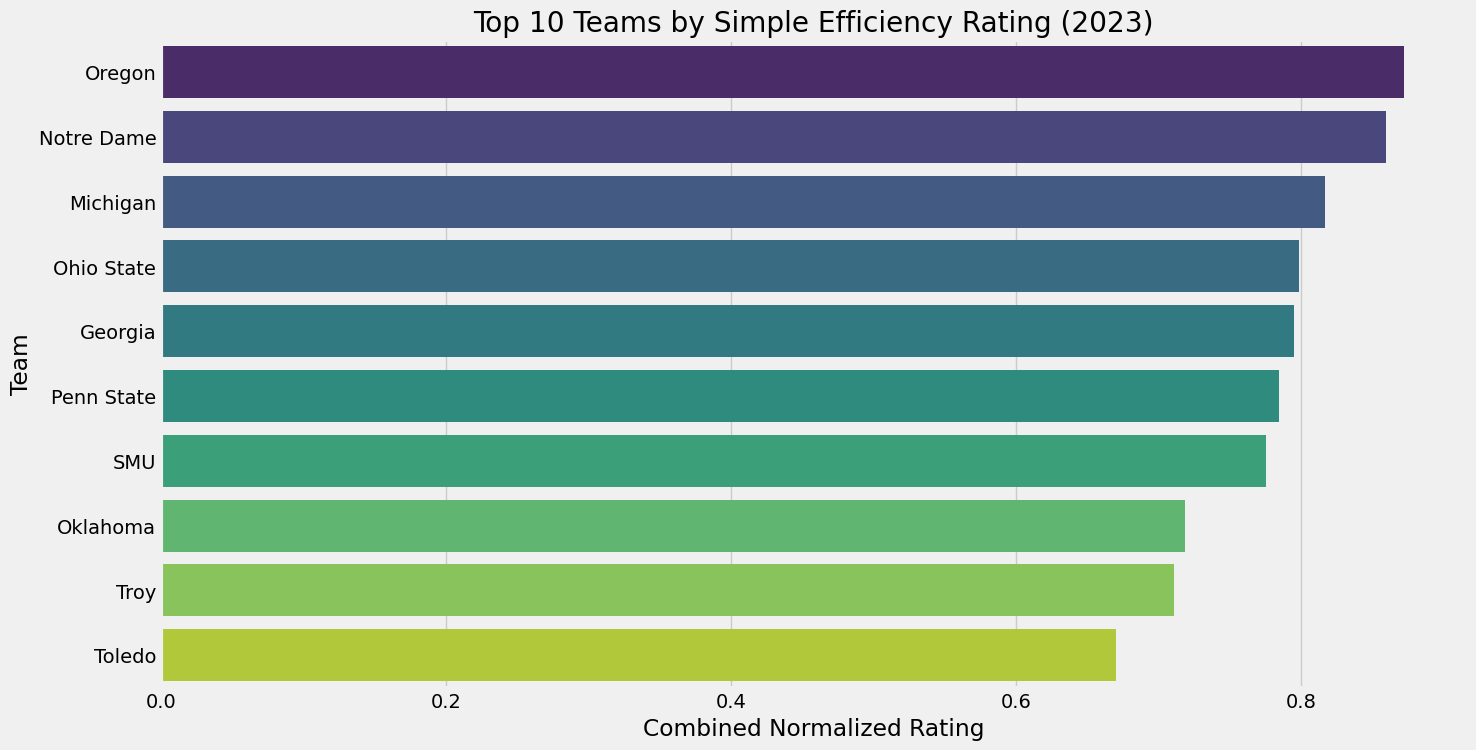

In [7]:
# 📊 Visualize top 10 teams
sns.barplot(
    data=top_teams.head(10),
    x='rating',
    y='team',
    palette='viridis',
    hue=top_teams.head(10)['team'],
    legend=False
)
plt.title("Top 10 Teams by Simple Efficiency Rating (2023)")
plt.xlabel("Combined Normalized Rating")
plt.ylabel("Team")
plt.show()

In [13]:
# 🥇 Build less simple rankings:
# We'll use offensive success rate (higher is better) and defensive success rate (lower is better) in addition to PPA
# Normalize all so higher = better

# Create a helper function to normalize metrics
def normalize_metric(series, invert=False):
    if invert:
        return (series.max() - series) / (series.max() - series.min())
    else:
        return (series - series.min()) / (series.max() - series.min())

# Normalize metrics (min-max)
fbs_stats['offense_ppa_score'] = normalize_metric(fbs_stats['offense_ppa'])
fbs_stats['defense_ppa_score'] = normalize_metric(fbs_stats['defense_ppa'], invert=True)
fbs_stats['offense_success_rate_score'] = normalize_metric(fbs_stats['offense_successRate'])
fbs_stats['defense_success_rate_score'] = normalize_metric(fbs_stats['defense_successRate'], invert=True)

# Weighted average — you can tweak these weights
fbs_stats['rating'] = (0.25 * fbs_stats['offense_score']) + (0.25 * fbs_stats['defense_score']) + (0.25 * fbs_stats['offense_success_rate_score']) + (0.25 * fbs_stats['defense_success_rate_score'])

# Reprint top 25 teams by new rating
# 🏆 Top 25 teams by rating
top_teams = fbs_stats.sort_values('rating', ascending=False).head(25)
top_teams[['team', 'conference', 'offense_ppa', 'defense_ppa', 'offense_successRate', 'defense_successRate', 'rating']]

,team,conference,offense_ppa,defense_ppa,offense_successRate,defense_successRate,rating
84,Oregon,Big Ten,0.468550,0.063614,0.562963,0.383146,0.861210
77,Notre Dame,FBS Independents,0.341696,-0.005711,0.496278,0.343284,0.837654
33,Georgia,SEC,0.398788,0.072766,0.525654,0.375592,0.793100
61,Michigan,Big Ten,0.289624,-0.008876,0.474373,0.343458,0.792703
86,Penn State,Big Ten,0.246535,-0.013630,0.467033,0.327720,0.790066
79,Ohio State,Big Ten,0.292852,0.005520,0.460048,0.359660,0.746318
94,SMU,ACC,0.273828,0.009345,0.445233,0.346198,0.737229
80,Oklahoma,SEC,0.325356,0.079328,0.494143,0.380066,0.715158
44,James Madison,Sun Belt,0.228099,0.060295,0.463584,0.336438,0.711404
53,Louisville,ACC,0.227340,0.074089,0.484358,0.357228,0.694870


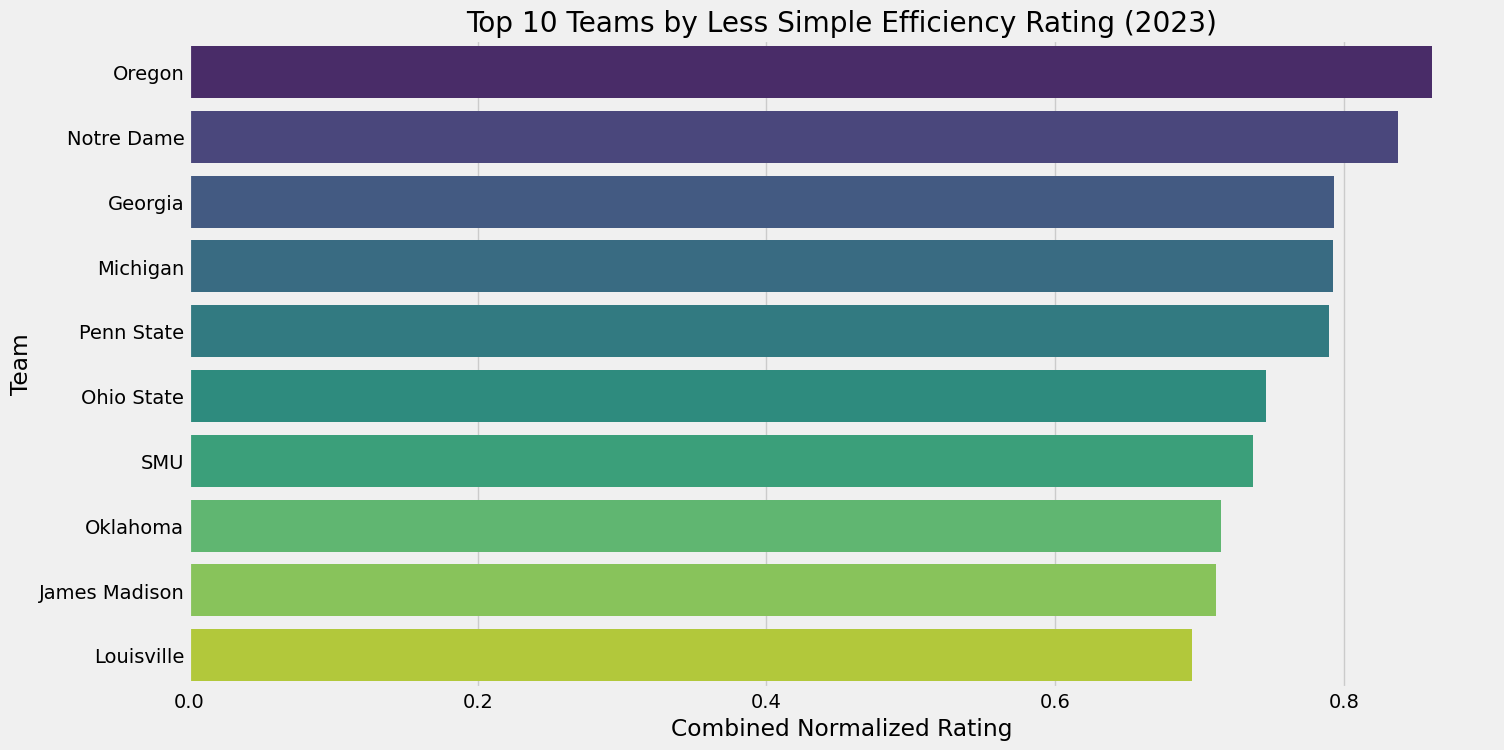

In [14]:
# 📊 Visualize new top 10 teams
sns.barplot(
    data=top_teams.head(10),
    x='rating',
    y='team',
    palette='viridis',
    hue=top_teams.head(10)['team'],
    legend=False
)
plt.title("Top 10 Teams by Less Simple Efficiency Rating (2023)")
plt.xlabel("Combined Normalized Rating")
plt.ylabel("Team")
plt.show()

In [15]:
# 💡 What next?
# - Add more metrics
# - Adjust the rating weights
# - Compare to final AP or CFP rankings to measure predictive power

# 🧪 You can also join this data with games.csv to track rating evolution over the season.